<AxesSubplot:title={'center':'Ranking de Estado Civil - Eleitores'}, xlabel='DS_ESTADO_CIVIL'>

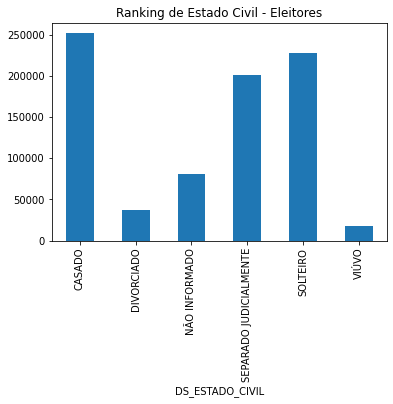

In [67]:
import pandas as pd
import plotly.graph_objects as go

path_files = './dados/'
filename_eleitorado = 'perfil_eleitorado_2020.csv'
filename_candidatos_sp = 'consulta_cand_2020_SP.csv'

dfc = pd.read_csv(path_files+filename_candidatos_sp, sep=';', encoding='iso-8859-1')
dfe = pd.read_csv(path_files+filename_eleitorado, sep=';', encoding='iso-8859-1')

municipio_eleitores_sjc = dfe.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')

prefeito_candidatos = dfc.query(f'NM_UE == "SÃO JOSÉ DOS CAMPOS" and DS_CARGO == "PREFEITO" and DS_SIT_TOT_TURNO == "ELEITO"')

prefeito_eleito = prefeito_candidatos['NM_CANDIDATO'].iloc[0]
prefeito_eleito_partido = prefeito_candidatos['SG_PARTIDO'].iloc[0]
prefeito_eleito_turno = prefeito_candidatos['NR_TURNO'].iloc[0]

escolaridade = municipio_eleitores_sjc.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum()
faixa_etaria = municipio_eleitores_sjc.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
estado_civil = municipio_eleitores_sjc.groupby(['DS_ESTADO_CIVIL'])['QT_ELEITORES_PERFIL'].sum()
# estado_civil = municipio_eleitores_sjc.groupby(['QT_ELEITORES_INC_NM_SOCIAL'])['QT_ELEITORES_INC_NM_SOCIAL'].sum()

dfEsc = pd.DataFrame(data = escolaridade).sort_values(by='QT_ELEITORES_PERFIL', axis=0, ascending = False).iloc[0]
dfEst = pd.DataFrame(data = estado_civil).sort_values(by='QT_ELEITORES_PERFIL', axis=0, ascending = False).iloc[0]
dfFai = pd.DataFrame(data = faixa_etaria).sort_values(by='QT_ELEITORES_PERFIL', axis=0, ascending = False).iloc[0]

dfTex = pd.concat([pd.DataFrame({"PREFEITO ELEITO": [prefeito_eleito], "PARTIDO": [prefeito_eleito_partido], "TURNO": [prefeito_eleito_turno], "ESCOLARIDADE DO ELEITOR": [dfEsc.name], "ESTADO CIVIL DO ELEITOR": [dfEst.name], "FAIXA ETÁRIA DO ELEITOR": [dfFai.name]})])
dfTex.to_csv('export/representante_eleito_e_perfil_eleitorado.csv', encoding='utf-8')

escolaridade.plot(kind='bar',title="Ranking de Grau de Escolaridade - Eleitores")
faixa_etaria.plot(kind='bar',title="Ranking de Faixa Etária - Eleitores")
estado_civil.plot(kind='bar',title="Ranking de Estado Civil - Eleitores")

# escMaior = 0
# for esc in dfMaiorEsc:
#     print(esc)

# print(escMaior)



# print("Prefeito eleito: ",prefeito_eleito)
# print("Partido: ",prefeito_eleito_partido)
# print("Turno: ",prefeito_eleito_turno)

# dfm = pd.DataFrame(columns=["Município", "Jovens_pct", "Jovens_abs", "Idosos_pct", "Idosos_abs"])

# filtroEleitoresTotal = municipio_eleitores_sjc['QT_ELEITORES_PERFIL'].sum()
# filtroEleitoresFaixaEtaria = municipio_eleitores_sjc.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()

# # Eleitores Jovens
# f18anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('18 anos')]).values
# f19anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('19 anos')]).values
# f20anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('20 anos')]).values
# f21anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('21 a 24 anos')]).values
# f25anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('25 a 29 anos')]).values

# # Eleitores Idosos
# f60anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('60 a 64 anos')]).values
# f65anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('65 a 69 anos')]).values
# f70anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('70 a 74 anos')]).values
# f75anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('75 a 79 anos')]).values
# f80anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('80 a 84 anos')]).values
# f85anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('85 a 89 anos')]).values
# f90anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('90 a 94 anos')]).values
# f95anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('95 a 99 anos')]).values
# f100anos = (filtroEleitoresFaixaEtaria[filtroEleitoresFaixaEtaria.index.str.startswith('100 anos ou mais')]).values

# # Caso alguma faixa etária não exista no município analisado,
# # é atribuído o valor 0 a ela, para não atrapalhar nos cálculos.
# if len(f18anos) == 0: f18anos = [0]
# if len(f19anos) == 0: f19anos = [0]
# if len(f20anos) == 0: f20anos = [0]
# if len(f21anos) == 0: f20anos = [0]
# if len(f25anos) == 0: f20anos = [0]    
# if len(f60anos) == 0: f60anos = [0]
# if len(f65anos) == 0: f65anos = [0]
# if len(f70anos) == 0: f70anos = [0]
# if len(f75anos) == 0: f75anos = [0]
# if len(f80anos) == 0: f80anos = [0]
# if len(f85anos) == 0: f85anos = [0]
# if len(f90anos) == 0: f90anos = [0]
# if len(f95anos) == 0: f95anos = [0]
# if len(f100anos) == 0: f100anos = [0]

# # Removendo os "[ ]"
# f18anos = f18anos[0]
# f19anos = f19anos[0]
# f20anos = f20anos[0]
# f21anos = f21anos[0]
# f25anos = f25anos[0]
# f60anos = f60anos[0]
# f65anos = f65anos[0]
# f70anos = f70anos[0]
# f75anos = f75anos[0]
# f80anos = f80anos[0]
# f85anos = f85anos[0]
# f90anos = f90anos[0]
# f95anos = f95anos[0]
# f100anos = f100anos[0]

# # Output do cálculo
# abs_jovens = f18anos + f19anos + f20anos + f21anos + f25anos
# abs_idosos = f60anos + f65anos + f70anos + f75anos + f80anos + f85anos + f90anos + f95anos + f100anos
# pct_jovens = abs_jovens / filtroEleitoresTotal
# pct_idosos = abs_idosos / filtroEleitoresTotal


# # Gravando a cidade no dataframe acumulador
# dft = pd.DataFrame({"Município":"SÃO JOSÉ DOS CAMPOS", "Jovens_pct":[pct_jovens], "Jovens_abs":[abs_jovens], "Idosos_pct":[pct_idosos], "Idosos_abs":[abs_idosos]})
# dfm = dfm.append(dft)



In [3]:
# dfm.head()
    

,Município,Jovens_pct,Jovens_abs,Idosos_pct,Idosos_abs
0,SÃO JOSÉ DOS CAMPOS,0.216347,116936,0.204673,110626


escolaridade:  AxesSubplot(0.125,0.125;0.775x0.755)


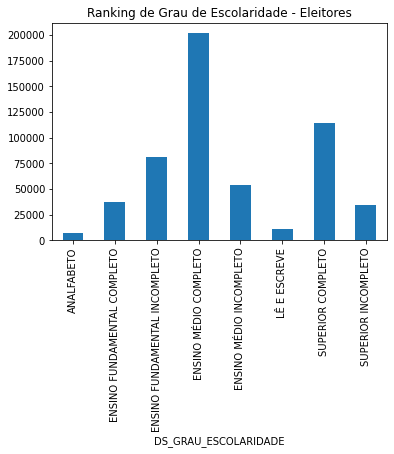

In [4]:
# GERANDO DADOS DE GRAU DE ESCOLARIDADE QUE MAIS APARECEU
escolaridade = municipio_eleitores_sjc.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().plot(kind='bar',title="Ranking de Grau de Escolaridade - Eleitores")
# print("escolaridade: ",escolaridade)

estado_civil:  AxesSubplot(0.125,0.125;0.775x0.755)


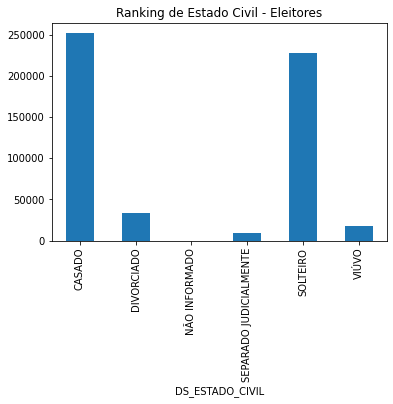

In [8]:
# GERANDO DADOS DE ESTADO CIVIL QUE MAIS APARECEU
estado_civil = municipio_eleitores_sjc.groupby(['DS_ESTADO_CIVIL'])['QT_ELEITORES_PERFIL'].sum().plot(kind='bar',title="Ranking de Estado Civil - Eleitores")
# print("estado_civil: ",estado_civil)
